In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

In [3]:
from transformers import AutoModelForCausalLM, AutoTokenizer

from core.utils.device import DEVICE
from core.utils.theme import set_theme

set_theme()

model = AutoModelForCausalLM.from_pretrained("meta-llama/Llama-3.2-1B")
model.to(DEVICE)
model.eval()
tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-3.2-1B")

In [4]:
import json

toy_data = None
with open("../../data/toy_data.json") as f:
    toy_data = json.load(f)

Data len:  1


100%|██████████| 1/1 [00:00<00:00,  1.63it/s]


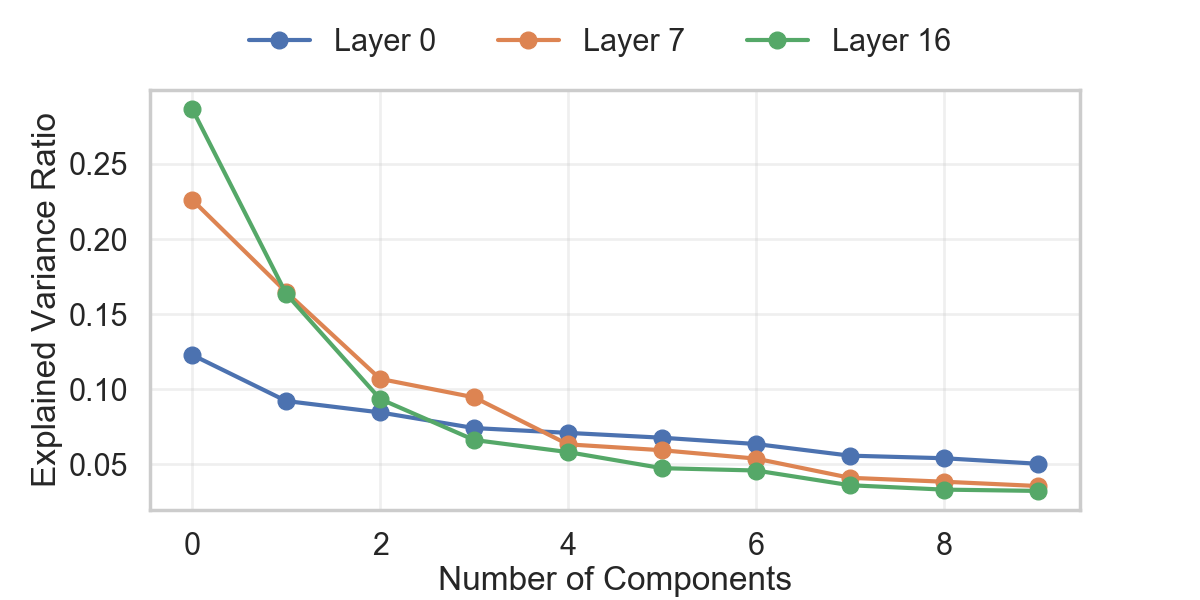

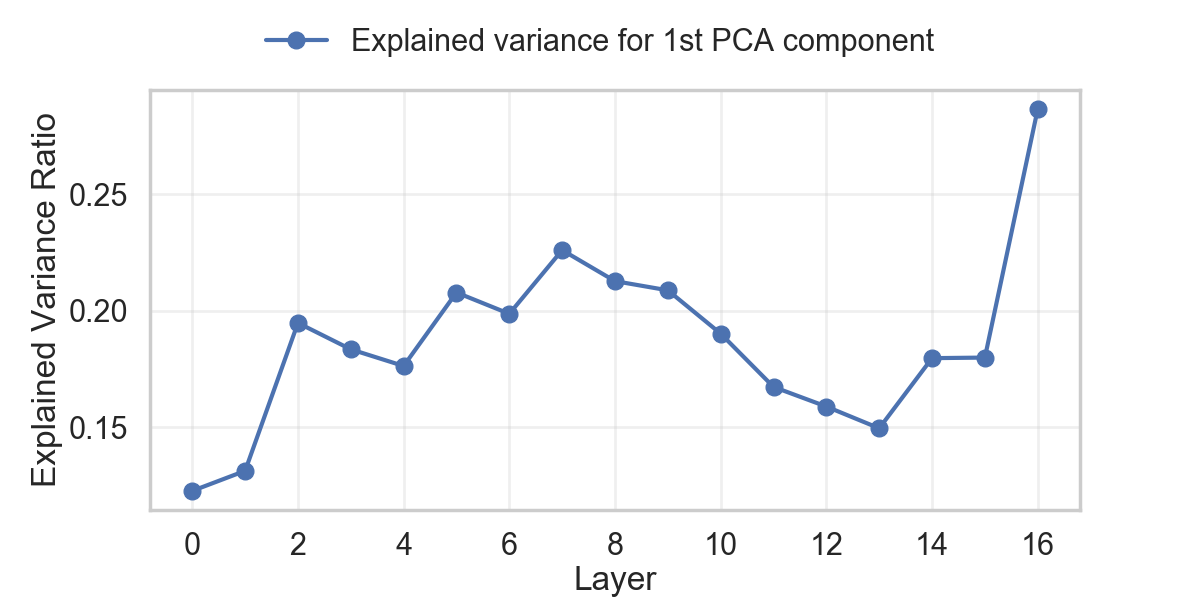

In [5]:
from core.gather_data.hidden_space import collect_hidden_space_by_language
from core.steering.pca import PCASteering
from core.visualize.visualize_explained_variance import visualize_explained_variance

hidden_space_by_language_train, token_map_for_language_train = collect_hidden_space_by_language(
    model, tokenizer, toy_data[:1]
)

pca_steering = PCASteering().fit(hidden_space_by_language_train)

visualize_explained_variance(pca_steering.explained_variance_ratios)

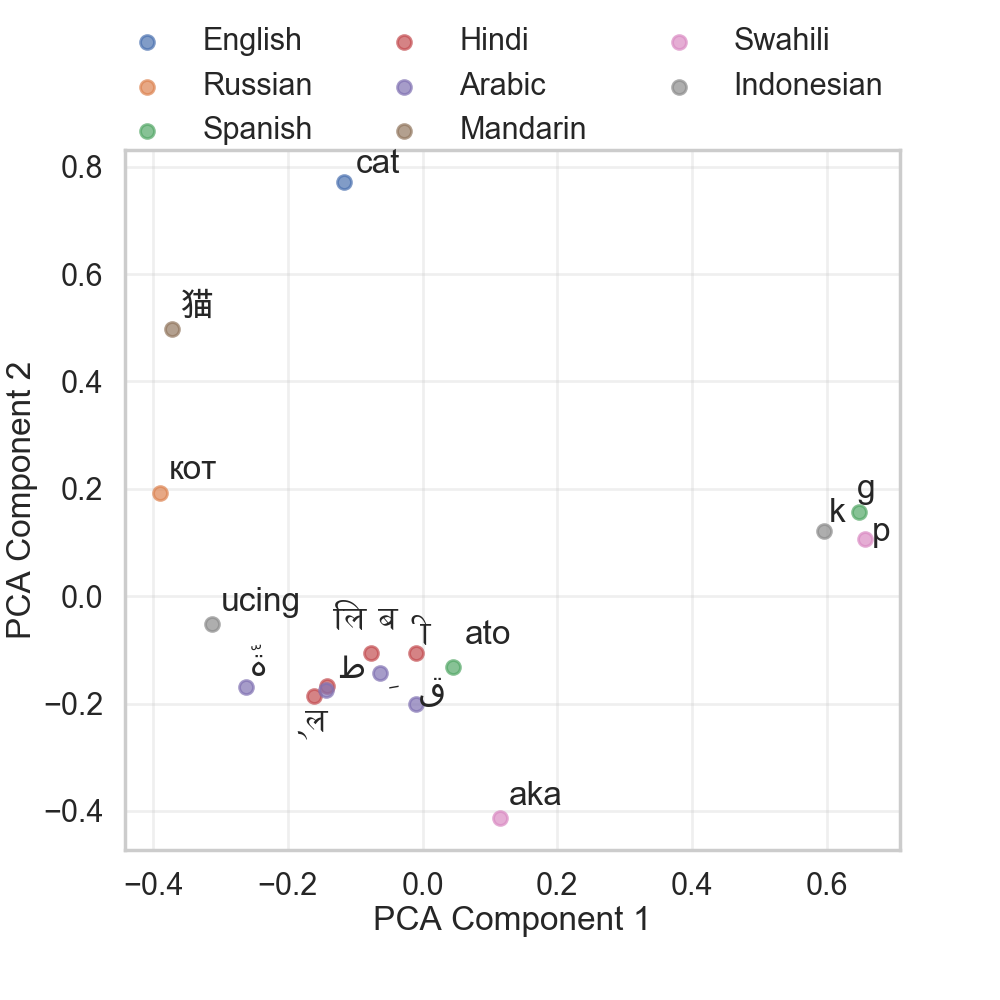

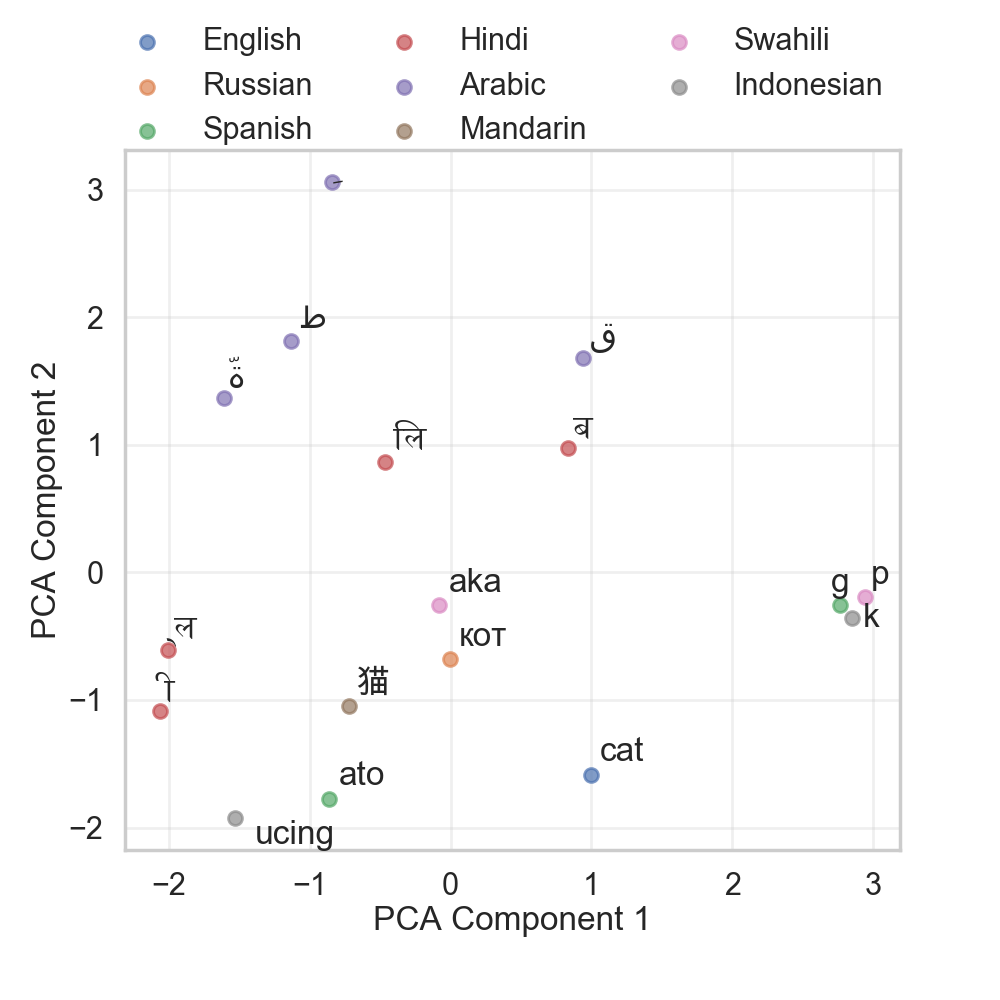

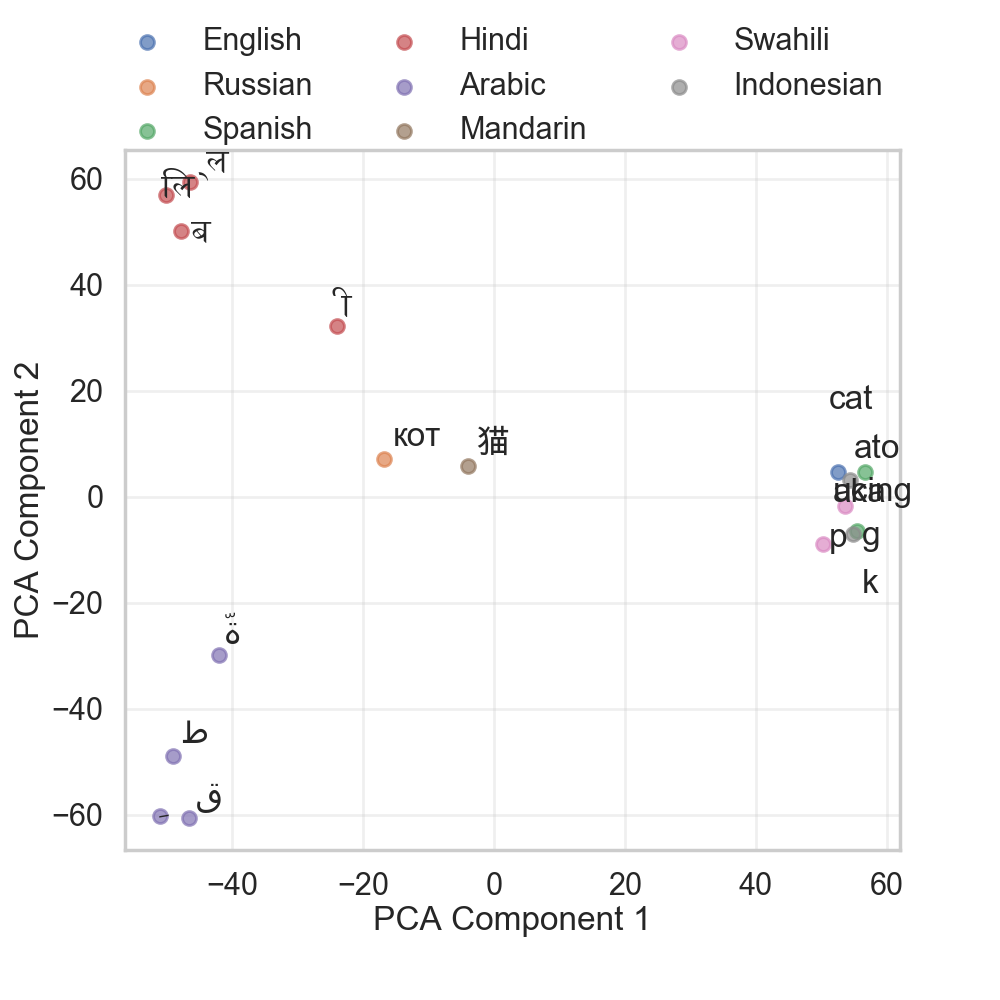

In [6]:
from core.visualize.visualize_projections import visualize_projections

projections_train = pca_steering.transform(hidden_space_by_language_train)

visualize_projections(
    hidden_space_by_language_train, token_map_for_language_train, projections_train, tokenizer, show_annotations="all"
)

Data len:  1


100%|██████████| 1/1 [00:00<00:00,  1.32it/s]


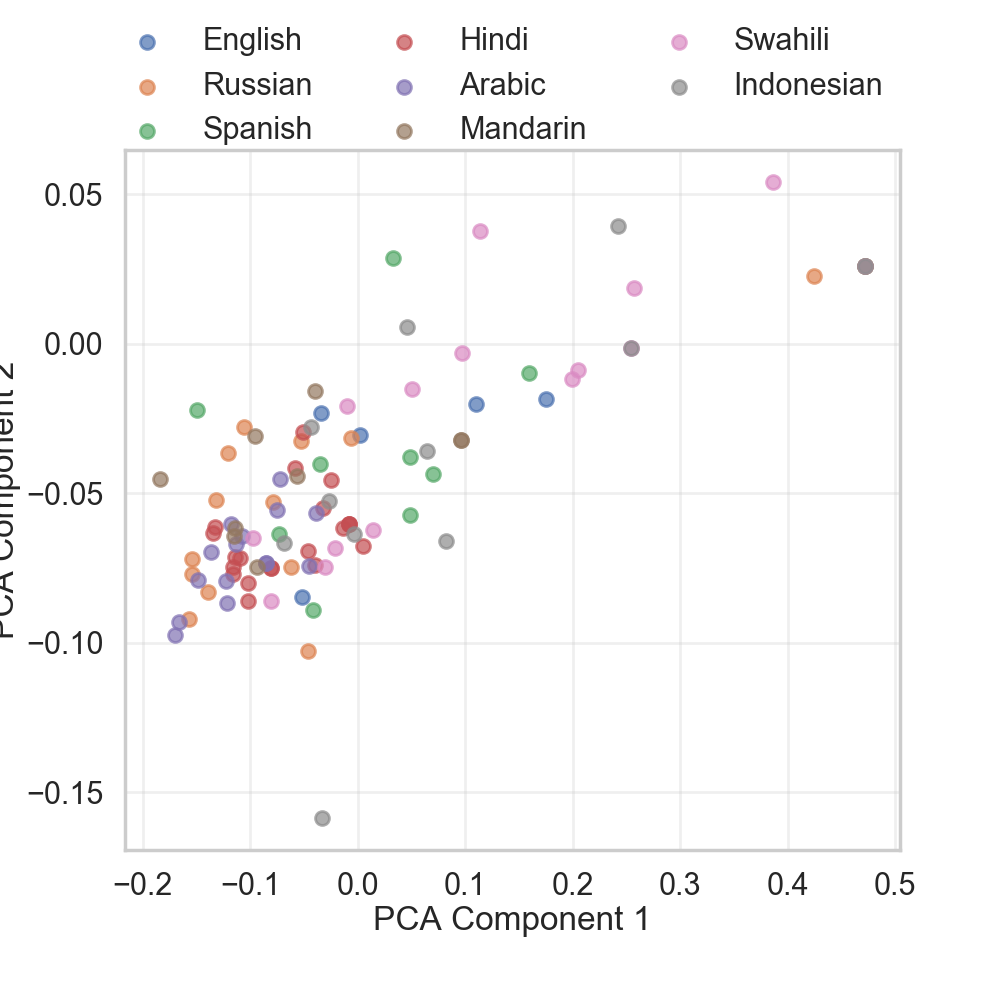

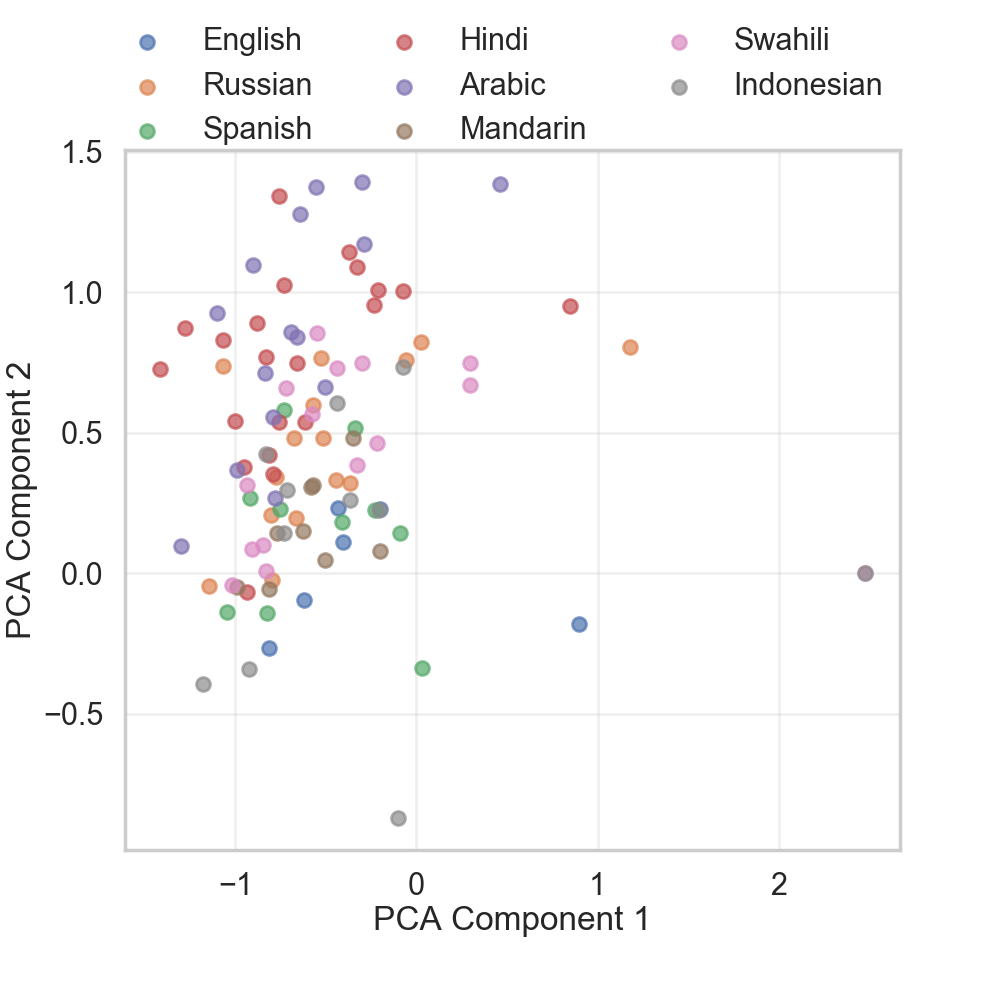

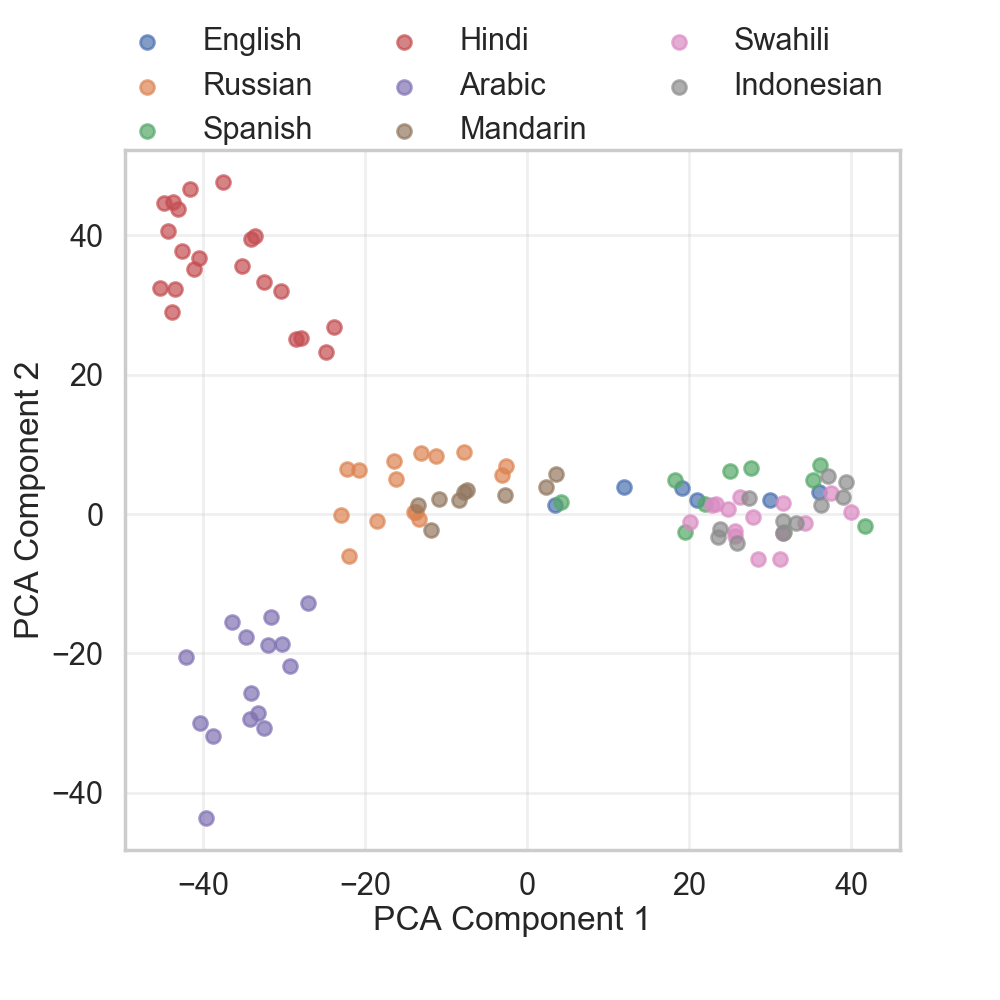

In [7]:
from core.visualize.visualize_projections import visualize_projections

hidden_space_by_language_test, token_map_for_language_test = collect_hidden_space_by_language(
    model, tokenizer, toy_data[2:]
)

projections_test = pca_steering.transform(hidden_space_by_language_test)

visualize_projections(hidden_space_by_language_test, token_map_for_language_test, projections_test, tokenizer)

Data len:  1


100%|██████████| 1/1 [00:00<00:00,  1.56it/s]


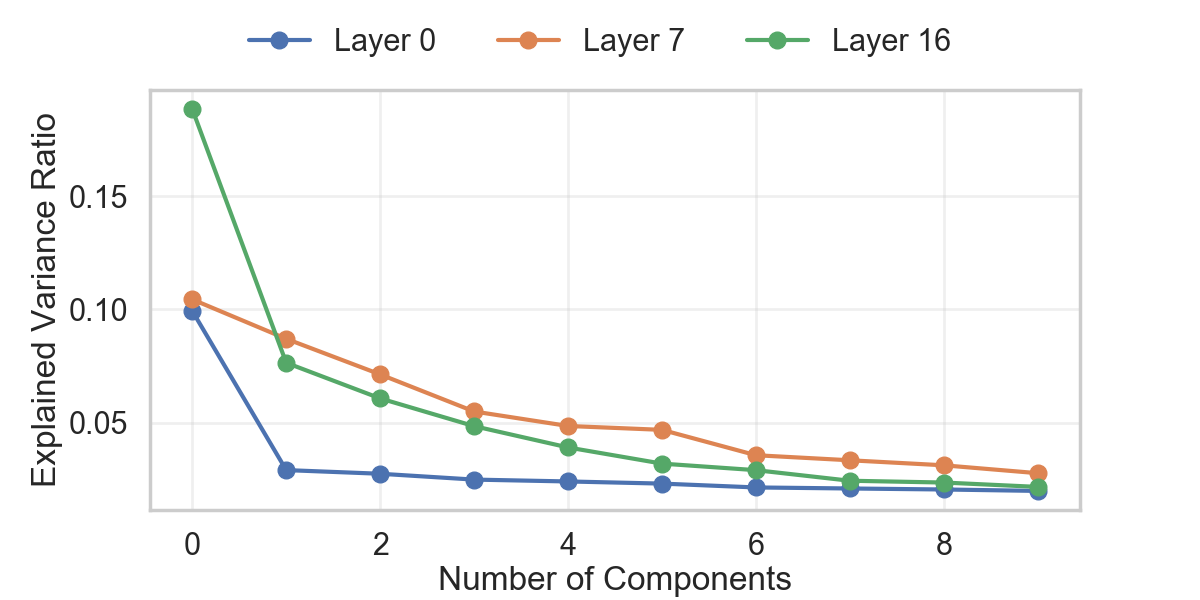

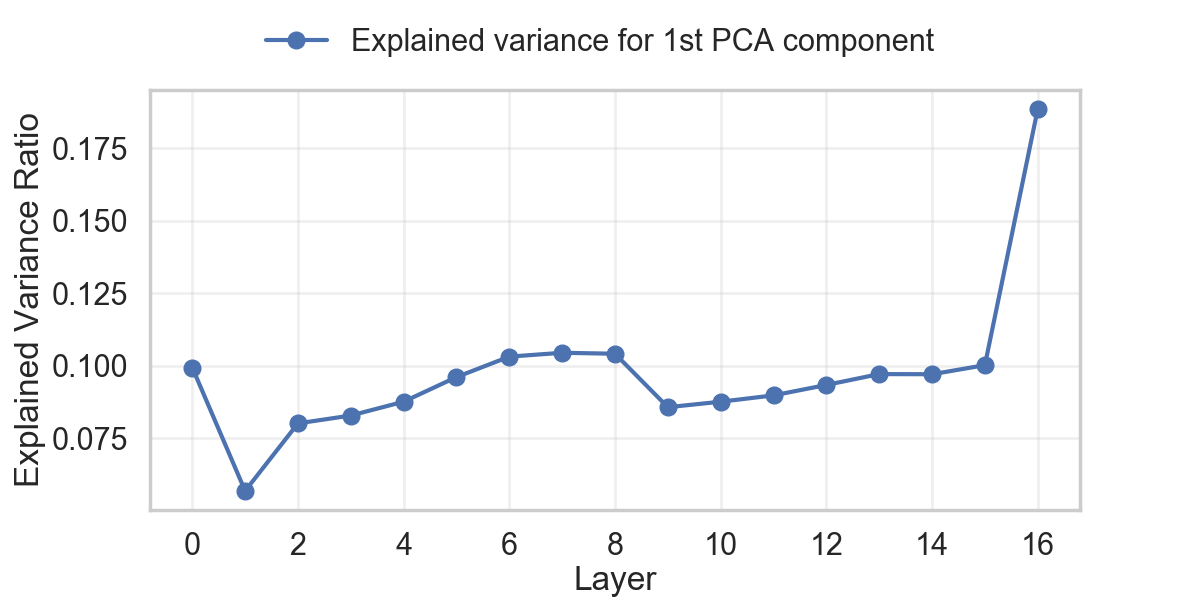

In [8]:
from core.gather_data.hidden_space import collect_hidden_space_by_language
from core.steering.pca import PCASteering
from core.visualize.visualize_explained_variance import visualize_explained_variance

hidden_space_by_language_train, token_map_for_language_train = collect_hidden_space_by_language(
    model, tokenizer, toy_data[1:2]
)

pca_steering = PCASteering().fit(hidden_space_by_language_train)

visualize_explained_variance(pca_steering.explained_variance_ratios)

Data len:  1


100%|██████████| 1/1 [00:02<00:00,  2.25s/it]


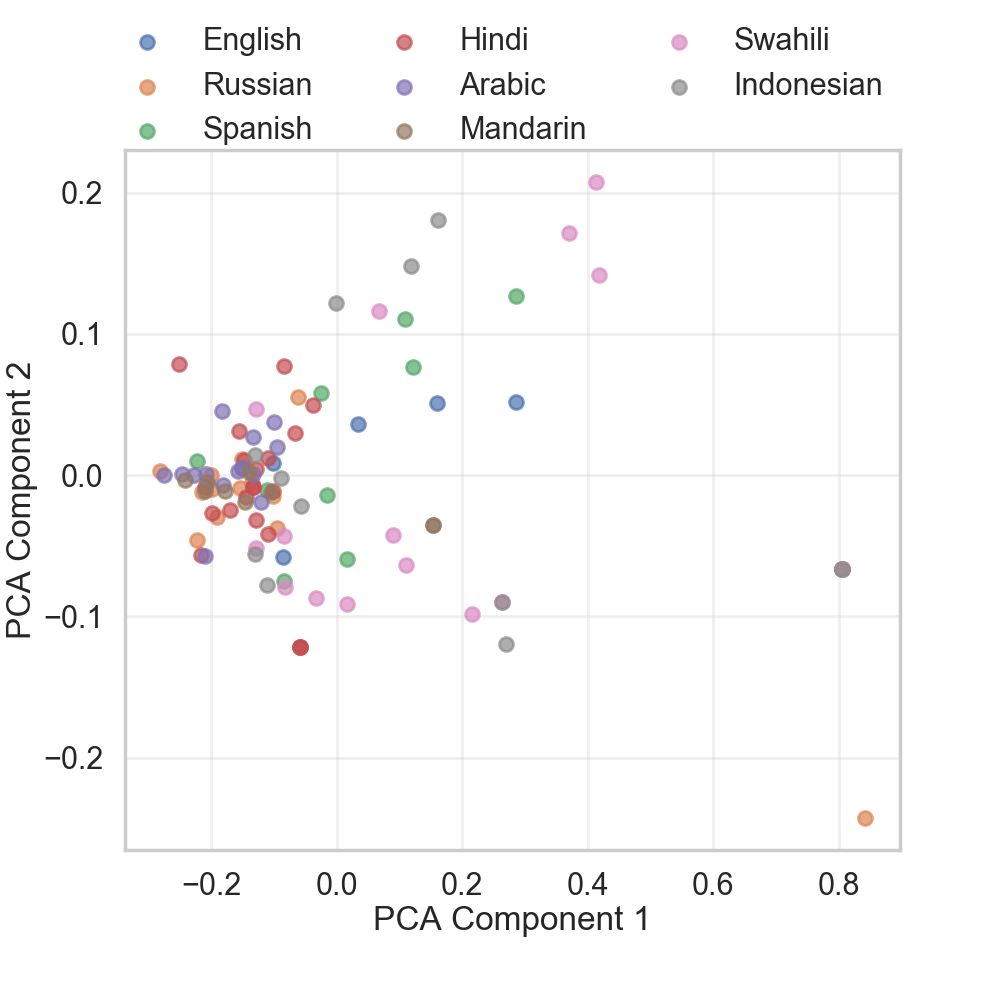

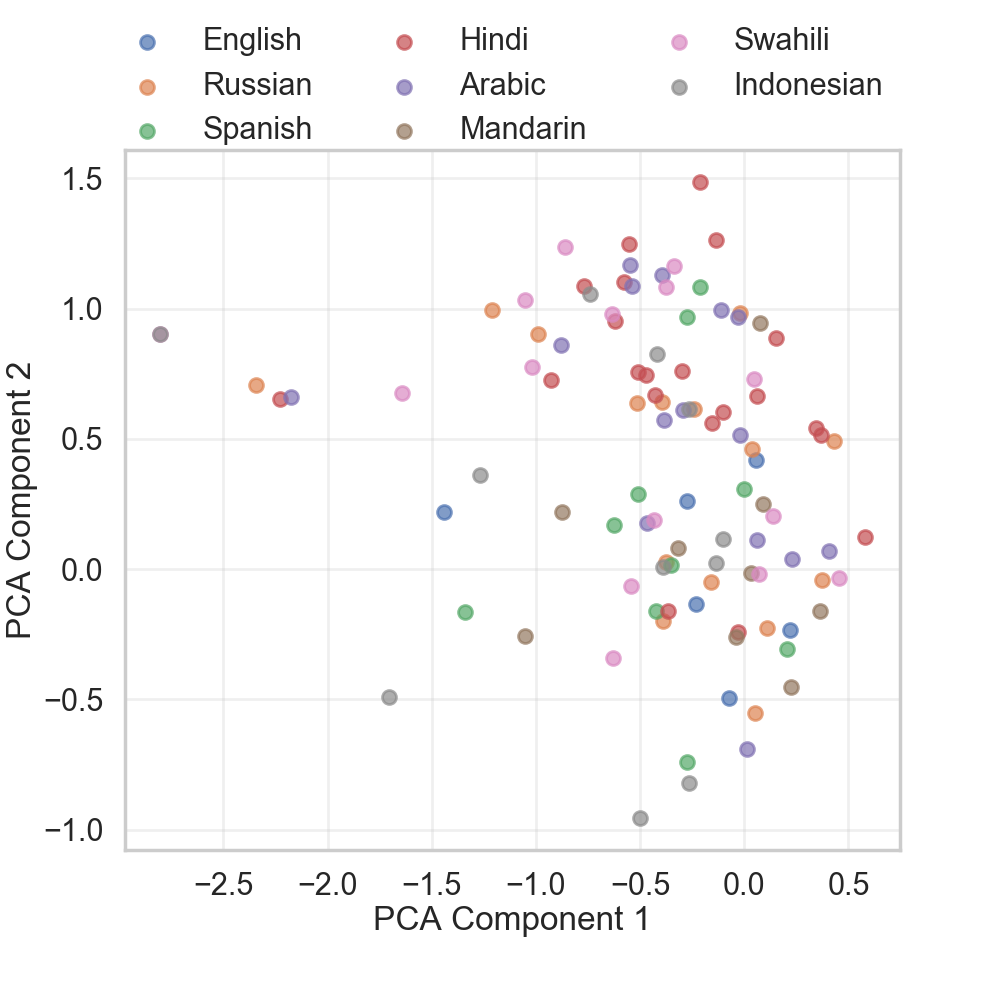

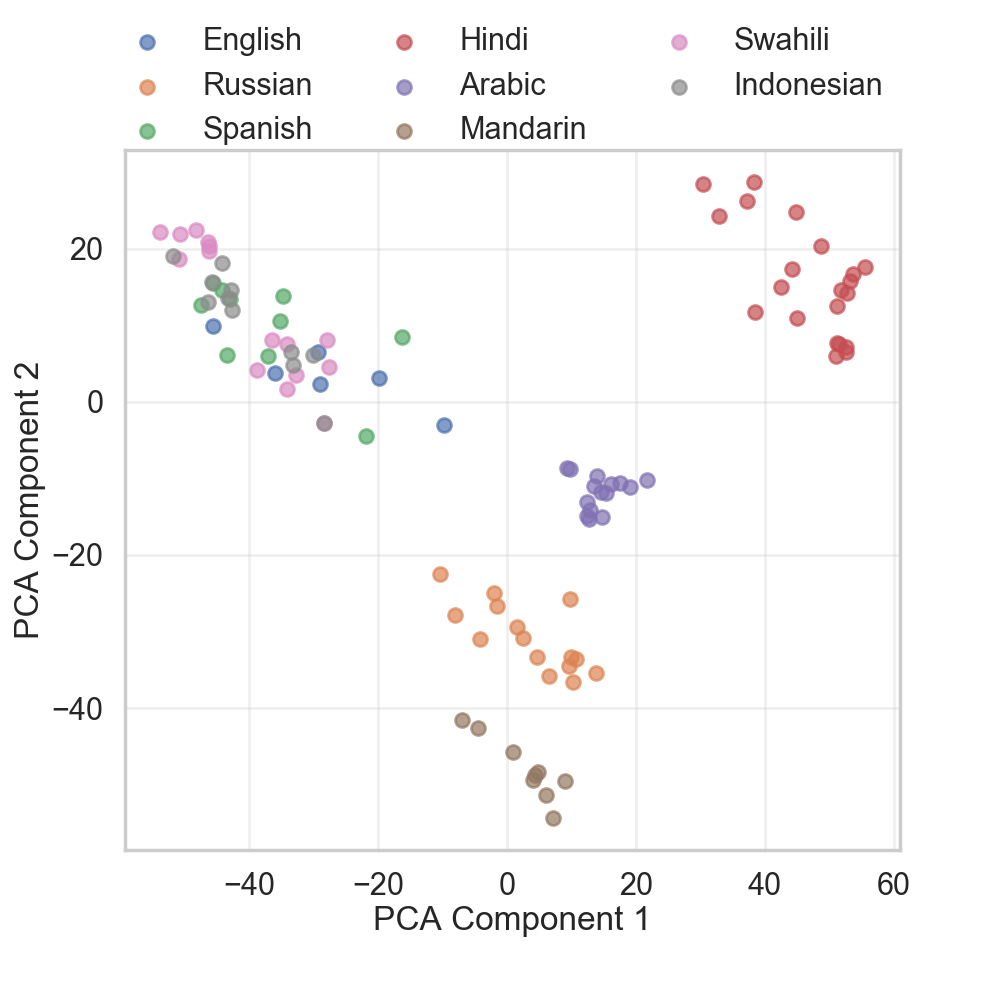

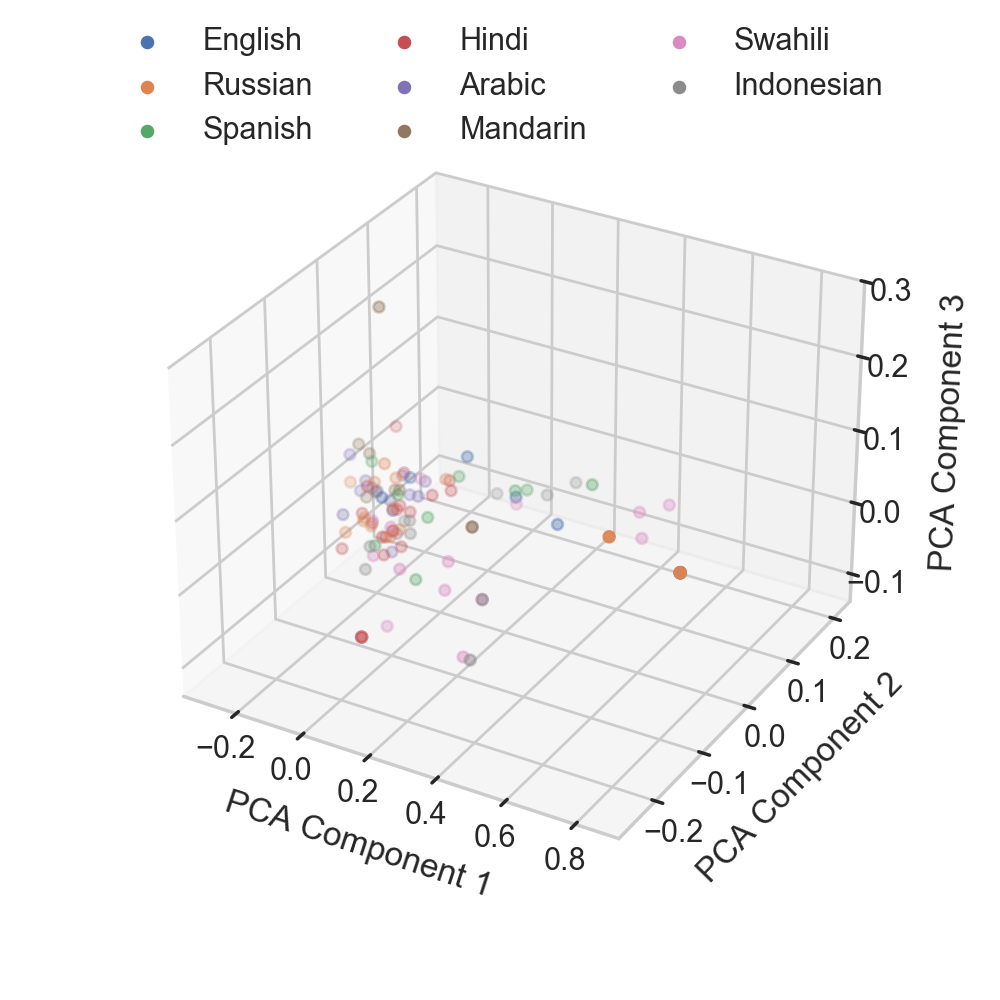

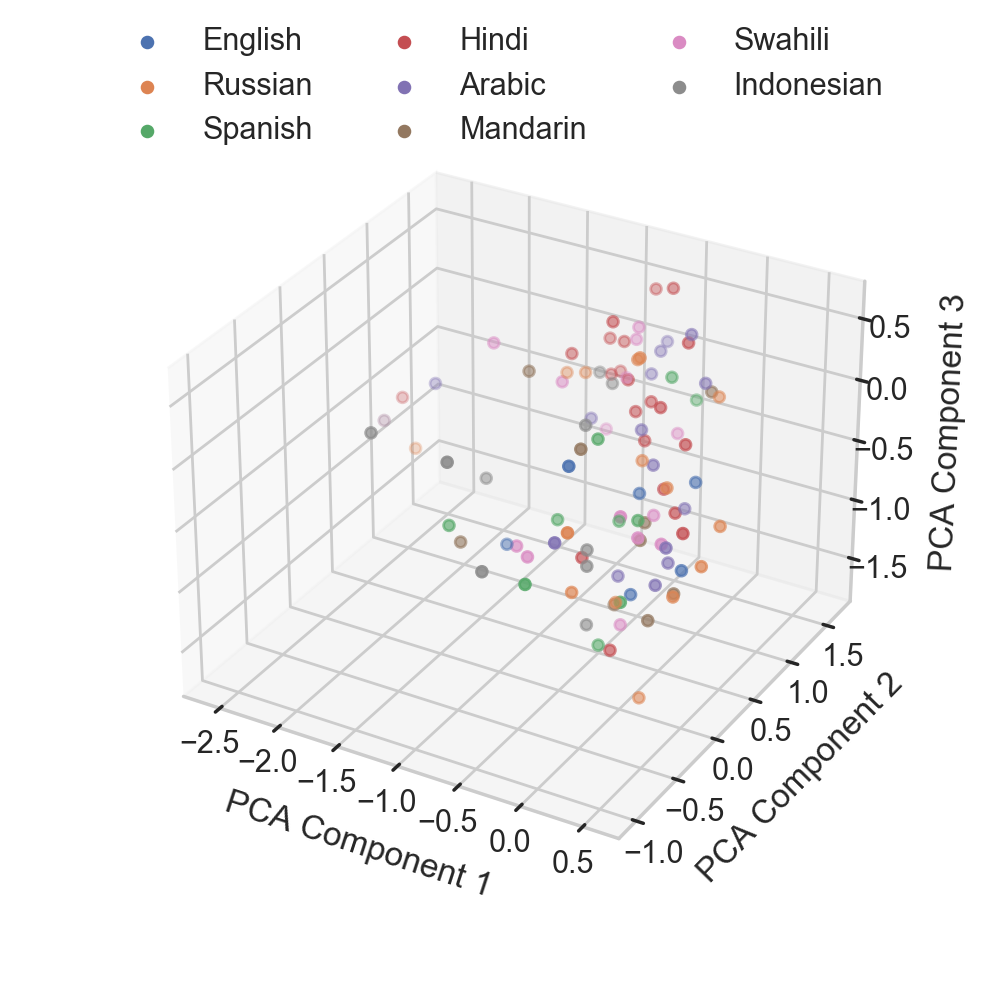

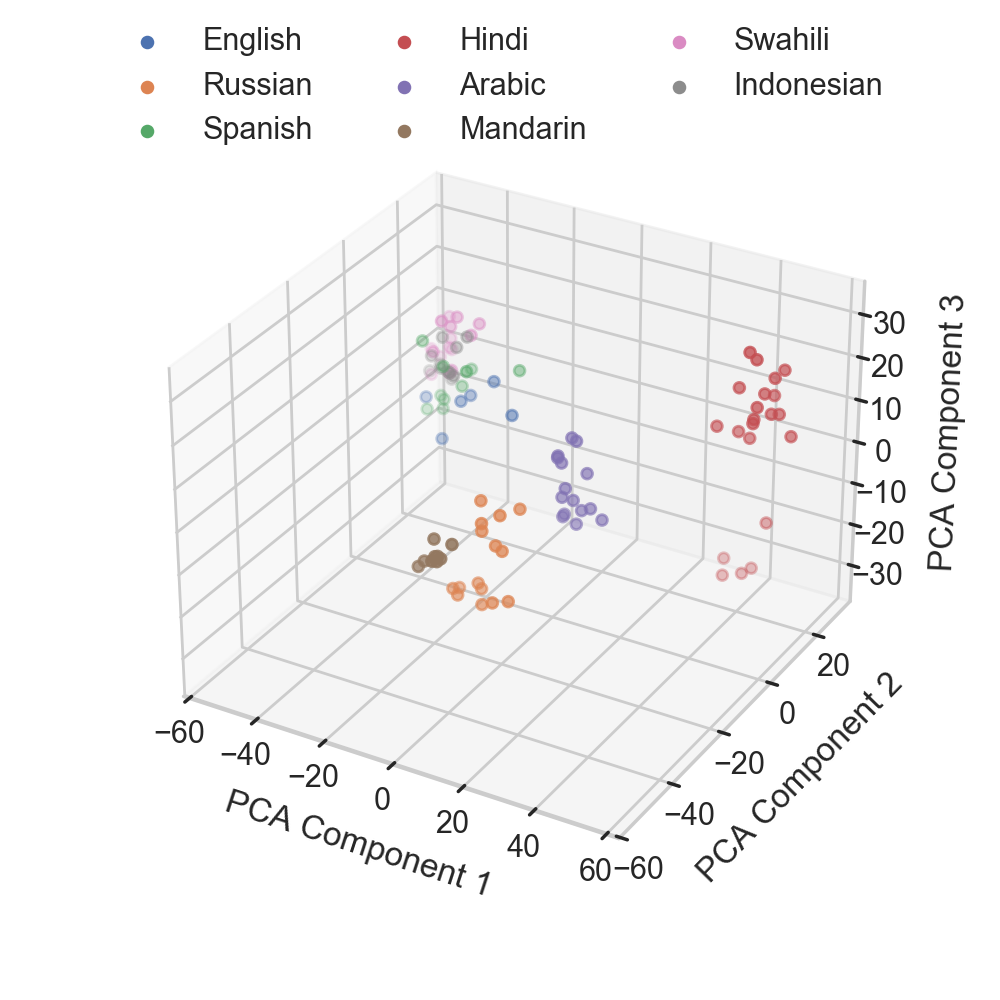

In [12]:
from core.visualize.visualize_projections import visualize_projections
from core.visualize.visualize_projections_3d import visualize_projections_3d

hidden_space_by_language_test, token_map_for_language_test = collect_hidden_space_by_language(
    model, tokenizer, toy_data[2:]
)

projections_test = pca_steering.transform(hidden_space_by_language_test)

visualize_projections(hidden_space_by_language_test, token_map_for_language_test, projections_test, tokenizer)
visualize_projections_3d(hidden_space_by_language_test, token_map_for_language_test, projections_test, tokenizer)